In [385]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

A good [resource](https://towardsdatascience.com/how-to-crush-your-data-take-home-interview-a0b9f7c97d6). 

When you're done, create a brief presentation: 
- Introduce problem
- Overview of process 
- Highlight key results 
- Recommendations / Conclusions / Future Work 

# Data Analysis Skeleton (TITLE)

This project is broken into 6 steps: 
1. [Problem Definition](#problem_definition)
2. [Gathering Data / Information](#get_data)
3. [Data Cleaning / Imputation](#clean)
4. [Exploratory Analysis](#explore)
5. [Model Fitting](#fit)
6. [Interpret Results](#interpret)

# 1. Problem definition <a id='problem_definition'></a>

Given various characteristics for a wine, predict the quality score a judge would give the wine. 

# 2. Gathering Data / Information <a id='get_data'></a>

Data from [Kaggle Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?datasetId=4458&sortBy=voteCount)

In [386]:
wine = pd.read_csv('winequality-red.csv', sep=",")

In [387]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [388]:
print(f"There are {wine.shape[0]} rows and {wine.shape[1]} columns.")

There are 1599 rows and 12 columns.


It appears that the factors are continuous. However, quality may have discrete values from 1-10. 

Merging data together: 
- `left.merge(right, how='inner', left_on='lkey', right_on='rkey')`

Creating column based on condition: 
- np.where(condition, value if condition is true, value if condition is false)
- `df['hasimage'] = np.where(df['photos']!= '[]', True, False)`

Merge reference [here](https://documentation.mindsphere.io/resources/html/predictive-learning/en-US/Images/Joins_Diagram.png). 

# 3. Data Cleaning / Imputation <a id='clean'></a>


Investigate the data to see if any cleaning operations need to be performed. 

In [389]:
# df.info() is a good check to ensure column datatype is as expected
# It can also be used to check if there are any null values in the columns 
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


It appears there are no null values in the data set. All data types are as expected. 

In [390]:
# Describe gives useful summary statistics about each numeric column in a dataframe 
# Can be a first indicator of distribution and potential outliers 
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


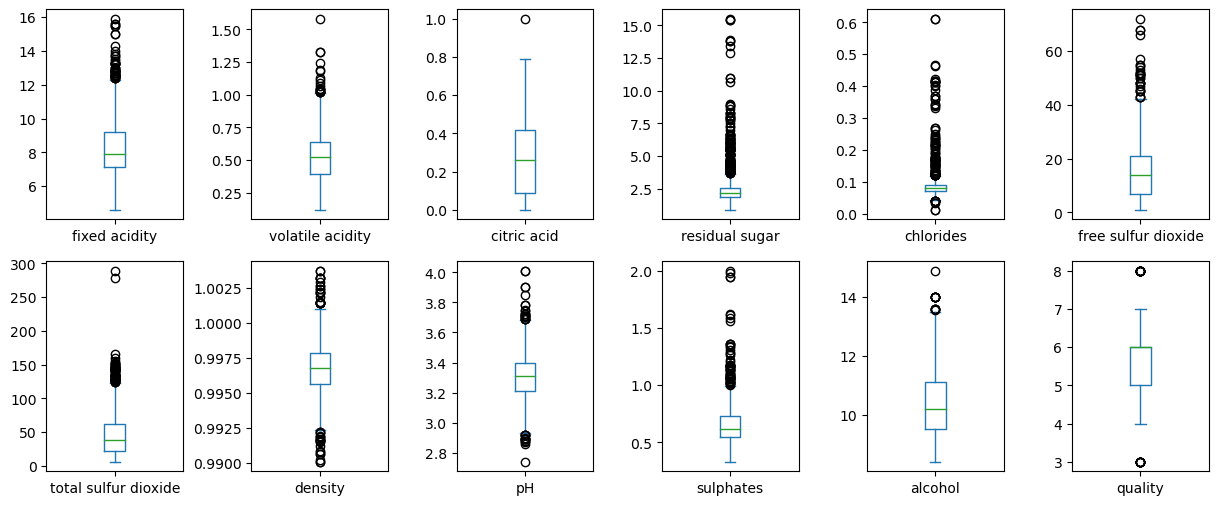

In [391]:
wine.plot(
    kind='box', 
    subplots=True, 
    layout=(2,6),
    sharey=False, 
    figsize=(15, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

NOTE: The scales here are VERY different... some scaling may be necessary later! 

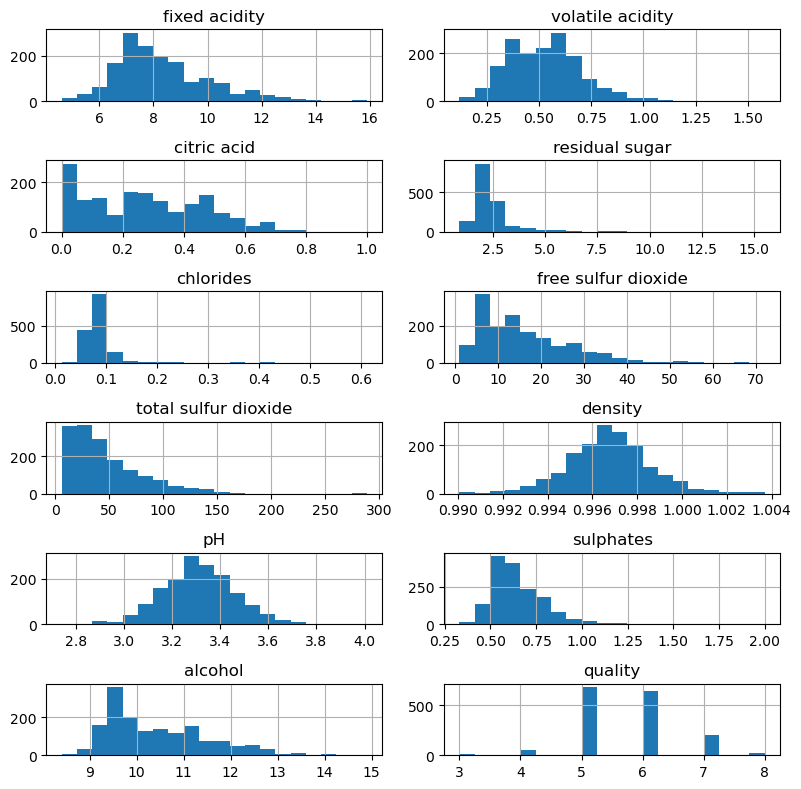

In [392]:
fig, axis = plt.subplots(6,2,figsize=(8,8))
wine.hist(ax=axis, bins=20)
fig.tight_layout()
plt.show()

# 4. Exploratory Analysis <a id='explore'></a>

Plot the data: 
- Identify which columns are categorical vs numerical 
- Identify any trends / patterns 
- Is seasonality important? 
- Are there outliers that need explaining? 
- Is there evidence of a business cycle? 

Quick correlation matrix. 
- `df.corr()`
- `sns.heatmp(df.corr(), cmap='YlGnBu',annot=True)`
- If two variables are highly correlated, it may make sense to remove one from the model before performing a linear regression. 

box plot
- `df.boxplot(column=['Col1', 'Col2', 'Col3'])`
- show the distribution of quantative data 
- the box shows the quartiles of the dataset, while the whiskers extend to show the rest of the distribution 

<AxesSubplot: >

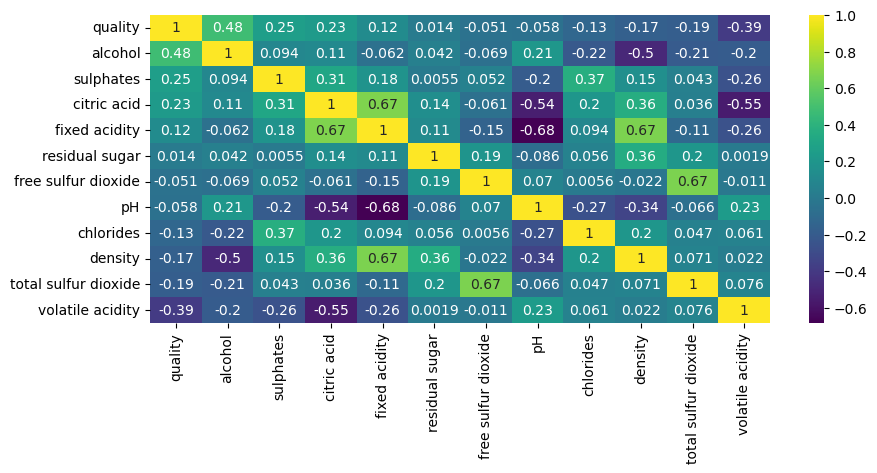

In [506]:
# Quality correlation matrix
plt.figure(figsize=(10,4))
# Order the cols from highest to lowest corr to quality 
cols = wine.corr().nlargest(wine.shape[1], 'quality')['quality'].index
cm = wine[cols].corr()
sns.heatmap(cm, annot=True, cmap = 'viridis')

Interesting discoveries from the correlation plot: 
- Quality and volatile acid are inversely correlated 
- Quality and alcohol are correlated 

Lower pH indicates more acidic: 
- Citric acid and volatile acidity are inversely correlated
- Fixed acidity and pH are strongly reversely correlated
- Fixed acidity and citric acid are strongly correlated



<AxesSubplot: xlabel='quality', ylabel='count'>

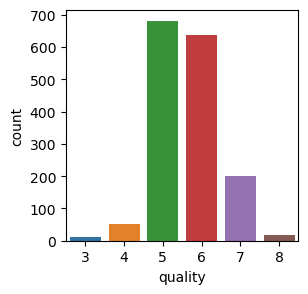

In [394]:
fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(x='quality', data=wine)

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

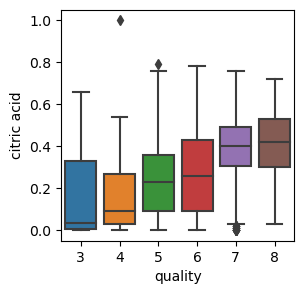

In [395]:
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(x='quality', y='citric acid', data = wine)

# 5. Model Fitting <a id='fit'></a>

### Scikit learn Multivariate Regression 

In [396]:
X = wine[['alcohol', 'volatile acidity', 'sulphates']]
y = wine['quality']

regr = linear_model.LinearRegression()
regr.fit(X.values, y.values)

# predict a single outcome: 
predictedQuality = regr.predict([[9.4, 0.7, 0.56]])

print(predictedQuality)

[5.04275133]


In [397]:
coef = regr.coef_
intercept = regr.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [ 0.30921776 -1.22140449  0.67902824]
intercept=  2.61083167468254


In [398]:
predicted = pd.DataFrame(regr.predict(X.values), columns=['Predicted Quality']) # Create new dataframe of column'Predicted Price'
predictions = pd.concat([wine["quality"],predicted], axis =1)
predictions["Predicted Quality Rounded"] = predictions["Predicted Quality"].round()
predictions.head(3)

,quality,Predicted Quality,Predicted Quality Rounded
0,5,5.042751,5.0
1,5,5.028069,5.0
2,5,5.154267,5.0


In [399]:
predictions['Accurate'] = np.where(predictions['quality'] == predictions['Predicted Quality Rounded'] , True, False)

In [400]:
print(f"Predictions: {predictions['Accurate'].count()}")
print(predictions["Accurate"].value_counts())

Predictions: 1599
True     931
False    668
Name: Accurate, dtype: int64


In [401]:
print(f"Multivariate regression gives {round(931/1599*100,1)}% accuracy")

Multivariate regression gives 58.2% accuracy


In [402]:
predictions["Error"] = predictions["quality"] - predictions["Predicted Quality"]
round(predictions["Error"].abs().mean(), 2)

0.52

Overall, the mean error in the prediction 0.52 points. 

### Statsmodels Multivariate Linear Regression: 

I'm performing the multivariate regression again to investigate statsmodel's summary "OLS Regression Results", which includes more detail about the fit, including p-value. 

I am intentionally including features that should not have a large influence on quality (such as 'residual sugar' and 'free sulfur dioxide')

In [567]:
labels = np.array(wine['quality'])
subset = wine[['alcohol', 'total sulfur dioxide', 'sulphates', 'citric acid', 'chlorides']]
x_train, x_test, y_train, y_test = train_test_split(subset, labels, test_size = 0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((1199, 5), (400, 5), (1199,), (400,))

In [568]:
x_test.head(2)

,alcohol,total sulfur dioxide,sulphates,citric acid,chlorides
121,10.9,56.0,0.60,0.04,0.119
413,11.7,19.0,0.82,0.53,0.097


In [569]:
#add constant to predictor variables
x_train = sm.add_constant(x_train)

#fit linear regression model
SM_model_fit = sm.OLS(y_train, x_train).fit()

#view model summary
print(SM_model_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     115.8
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          7.02e-100
Time:                        08:28:00   Log-Likelihood:                -1216.1
No. Observations:                1199   AIC:                             2444.
Df Residuals:                    1193   BIC:                             2475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.9142 

### Principal Components Analysis

split the x and y variables

In [404]:
x = wine.iloc[:,:11]
y = wine['quality']

In [405]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [406]:
pca = PCA()
x_pca = pca.fit_transform(x)

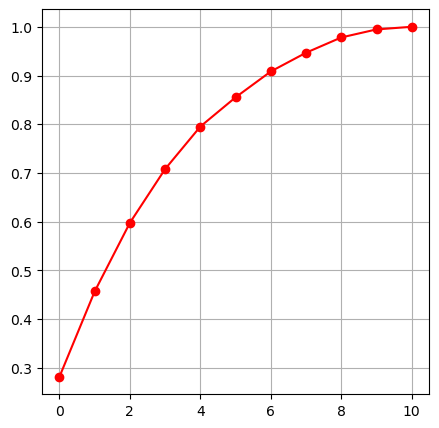

In [407]:
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [408]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

### Train and Test Sets 

In [409]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)


In [410]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 8)
(1199,)
(400, 8)
(400,)


### Logistic Regression 

In [411]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
quality_pred = LR_model.predict(x_test)

In [412]:
lr_conf_matrix = confusion_matrix(y_test, quality_pred)
lr_acc_score = accuracy_score(y_test, quality_pred)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[  0   2   1   0   0   0]
 [  0   0   7   7   0   0]
 [  0   0 131  51   0   0]
 [  0   0  50  85   7   0]
 [  0   0   3  35  19   0]
 [  0   0   0   1   1   0]]
58.75


### Random Forest 

In [413]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [414]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  0   1   2   0   0   0]
 [  0   0   9   5   0   0]
 [  0   0 146  34   2   0]
 [  0   0  34 102   6   0]
 [  0   0   3  30  24   0]
 [  0   0   0   1   1   0]]
68.0


# 6. Interpret Results <a id='interpret'></a>

Logistic Regression and multivariate analysis performed about the same with a 58% accuracy. 

Random forest performed significantly better with a 68% accuracy. 